In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Building train and test set Generator
train_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
test_data = ImageDataGenerator(rescale=1./255)
# Training generator on the test set
train_set = train_data.flow_from_directory('train',subset='training',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)
# Validation Set
val_set = train_data.flow_from_directory('train',subset='validation',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)


Found 3816 images belonging to 12 classes.
Found 951 images belonging to 12 classes.


In [2]:
train_set.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

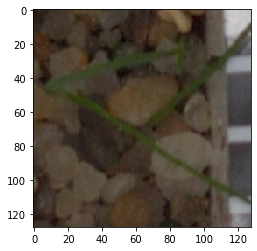

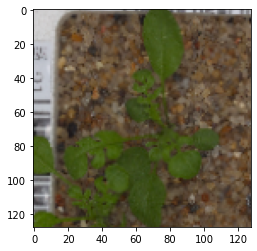

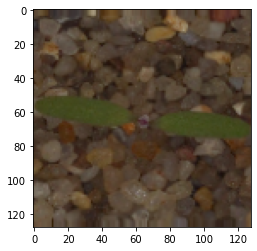

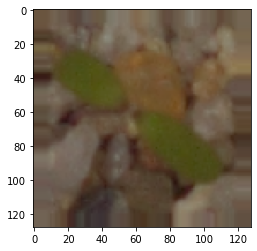

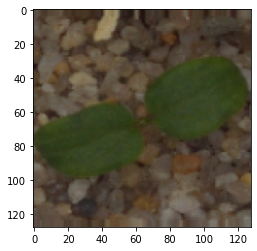

In [3]:
import matplotlib.pyplot as plt
x,y = train_set.next()
for i in range(0,5):
    image = x[i]
    plt.imshow(image)
    plt.show()
    x,y = train_set.next()

Train tune and test AIML image classifier model using: 

### SVM Model

In [4]:
# Building train and test set Generator
train_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
test_data = ImageDataGenerator(rescale=1./255)
# Training generator on the test set
train_set = train_data.flow_from_directory('train',subset='training',target_size=(128,128),batch_size=32,class_mode='sparse',shuffle=True)
# Validation Set
val_set = train_data.flow_from_directory('train',subset='validation',target_size=(128,128),batch_size=32,class_mode='sparse',shuffle=True)

Found 3816 images belonging to 12 classes.
Found 951 images belonging to 12 classes.


In [5]:
import numpy as np
x_train=np.concatenate([train_set.next()[0] for i in range(train_set.__len__())])
y_train=np.concatenate([train_set.next()[1] for i in range(train_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(3816, 128, 128, 3)
(3816,)


In [6]:
x_test=np.concatenate([val_set.next()[0] for i in range(val_set.__len__())])
y_test=np.concatenate([val_set.next()[1] for i in range(val_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(951, 128, 128, 3)
(951,)


In [7]:
x_model=[]
for i in range(len(x_train)):
    x_model.append(x_train[i].flatten())
    
x_model = np.array(x_model)

y_model=[]
for i in range(len(y_train)):
    y_model.append(y_train[i].flatten())
    
y_model = np.array(y_model)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(x_model)
xpca = pca.transform(x_model)

In [9]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=3) 

clf.fit(xpca , y_model)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [10]:
x_test1=[]
for i in range(len(x_test)):
    x_test1.append(x_test[i].flatten())
    
x_test1 = np.array(x_test1)
xpca_test = pca.transform(x_test1)

y_pred = clf.predict(xpca_test)

In [11]:
from sklearn.metrics import accuracy_score
print("Accuracy for SVM model =",accuracy_score(y_test,y_pred))

Accuracy for SVM model = 0.11251314405888538


### Neural Network Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers,optimizers

In [13]:
# Building train and test set Generator
train_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)
test_data = ImageDataGenerator(rescale=1./255)
# Training generator on the test set
train_set = train_data.flow_from_directory('train',subset='training',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)
# Validation Set
val_set = train_data.flow_from_directory('train',subset='validation',target_size=(128,128),batch_size=32,class_mode='categorical',shuffle=True)

Found 3816 images belonging to 12 classes.
Found 951 images belonging to 12 classes.


In [14]:
classifier_nn = Sequential()
classifier_nn.add(Flatten())
classifier_nn.add(Dense(units=1024,activation='relu'))
classifier_nn.add(Dense(units=512,activation='relu'))
classifier_nn.add(Dense(256,activation='relu'))
classifier_nn.add(Dense(128,activation='relu'))
classifier_nn.add(Dense(units=64,activation='relu'))
classifier_nn.add(Dense(units=12,activation='softmax'))

In [15]:
sgd =optimizers.Adam()
classifier_nn.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [16]:
import tensorflow
model_checkpoint=tensorflow.keras.callbacks.ModelCheckpoint('plant_seedings_nn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [17]:
history2 = classifier_nn.fit_generator(train_set,steps_per_epoch=int(3816/32),epochs=40,validation_data=val_set,validation_steps=int(951/32),callbacks=[model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
119/119 [==============================] - 227s 2s/step - loss: 3.7230 - accuracy: 0.1158 - val_loss: 2.4213 - val_accuracy: 0.1304
Epoch 2/40
119/119 [==============================] - 228s 2s/step - loss: 2.4142 - accuracy: 0.1728 - val_loss: 2.3692 - val_accuracy: 0.1207
Epoch 3/40
119/119 [==============================] - 234s 2s/step - loss: 2.3516 - accuracy: 0.1789 - val_loss: 2.2676 - val_accuracy: 0.2080
Epoch 4/40
119/119 [==============================] - 201s 2s/step - loss: 2.1966 - accuracy: 0.2217 - val_loss: 2.2467 - val_accuracy: 0.1778
Epoch 5/40
119/119 [==============================] - 202s 2s/step - loss: 2.0674 - accuracy: 0.2439 - val_loss: 2.1460 - val_accuracy: 0.2446
Epoch 6/40
119/119 [==============================] - 140s 1s/step - loss: 2.0215 - accuracy: 0.2688 - val_loss: 2.0157 - val_accuracy: 0.2996
Epoch 7/40
119/119 [==============================] - 103s 865ms/s

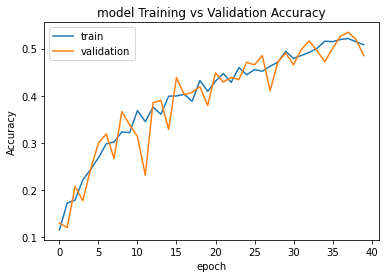

In [18]:
# "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model Training vs Validation Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

### CNN Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
classifier = Sequential()
classifier.add(Conv2D(64,(3,3),input_shape =(128,128,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(64,(3,3),activation='relu',padding='same'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=512,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=12,activation='softmax'))

In [21]:
opt=Adam(lr=0.001)
classifier.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
import tensorflow
model_checkpoint1=tensorflow.keras.callbacks.ModelCheckpoint('plant_seedings.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [23]:
history = classifier.fit_generator(train_set,steps_per_epoch=int(3816/32),epochs=40,validation_data=val_set,validation_steps=int(951/32),callbacks=[model_checkpoint1])

Epoch 1/40
119/119 [==============================] - 133s 1s/step - loss: 2.2879 - accuracy: 0.2069 - val_loss: 1.7588 - val_accuracy: 0.4159
Epoch 2/40
119/119 [==============================] - 125s 1s/step - loss: 1.6705 - accuracy: 0.4202 - val_loss: 1.4564 - val_accuracy: 0.4860
Epoch 3/40
119/119 [==============================] - 120s 1s/step - loss: 1.4025 - accuracy: 0.5085 - val_loss: 1.1669 - val_accuracy: 0.6196
Epoch 4/40
119/119 [==============================] - 161s 1s/step - loss: 1.1769 - accuracy: 0.5888 - val_loss: 1.0476 - val_accuracy: 0.6627
Epoch 5/40
119/119 [==============================] - 142s 1s/step - loss: 1.0306 - accuracy: 0.6387 - val_loss: 0.8553 - val_accuracy: 0.7080
Epoch 6/40
119/119 [==============================] - 132s 1s/step - loss: 0.8825 - accuracy: 0.6974 - val_loss: 0.8381 - val_accuracy: 0.7220
Epoch 7/40
119/119 [==============================] - 159s 1s/step - loss: 0.8222 - accuracy: 0.7178 - val_loss: 0.7430 - val_accuracy: 0.7802

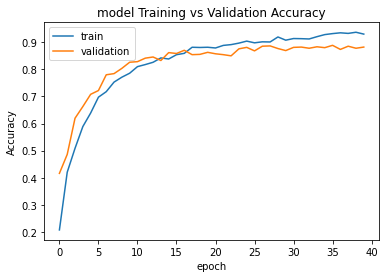

In [24]:
# "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model Training vs Validation Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

The Highest accuracy is for CNN Model.

In [25]:
import cv2 
test_image = cv2.imread('Predict.png')
test_image = cv2.resize(test_image,(128,128))

In [26]:
test_image.shape

(128, 128, 3)

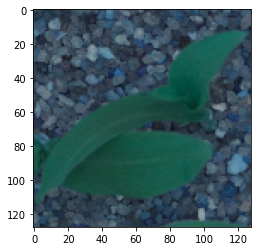

In [27]:
plt.imshow(test_image)

In [28]:
import numpy as np
test_image = np.expand_dims(test_image,axis=0)
test_image = test_image*1/255.0

In [29]:
result = classifier.predict(test_image*1/255.0)

result

array([[6.4372084e-06, 2.3110381e-31, 5.9572251e-29, 3.9956479e-22,
        1.5252013e-18, 5.6231675e-16, 9.9999356e-01, 5.3367354e-17,
        8.3868664e-25, 1.2663607e-28, 3.0353975e-13, 2.7906066e-20]],
      dtype=float32)

In [30]:
classes_dict = train_set.class_indices

In [31]:
prediction_class = []
for class_name,index in classes_dict.items():
    prediction_class.append(class_name)

In [32]:
predicted_index = np.argmax(result[0])

print(prediction_class[predicted_index])

Loose Silky-bent


In [33]:
#Pickling 
classifier.save('plant_seedings.h5')
classifier.save_weights('plant_seedings_weights.h5')

* CNN gave us way better results than Neural Network model
* In CNN filters will be learnt to generate required features where as in NN features have to be defined.
* In Supervised Approach, performance depends on input features.
* In Supervised Approach, The featues have to be well defined as the outcome is highly dependent on those.
* CNN is better cause of dimensionality reduction and prameter sharing. Computation is decreased.